In [1]:
import keras
import random, os
from keras.layers import *
from keras.models import Model, Sequential
from keras import backend as K
from glob import glob
import numpy as np
import re
from keras.utils.vis_utils import model_to_dot
import random
import matplotlib.pyplot as plt
from scipy.spatial import distance
from IPython.display import Image
import PIL

Using TensorFlow backend.


In [2]:
batch_size = 256
num_classes = 6
epochs = 1000
img_rows, img_cols = 28, 28
label = ["circle", "square", "triangle", "horizontal", "vertical", "diagonal"]

In [3]:
def load_data():
    tr_path = './dataset/trains/'
    te_path = './dataset/tests/'
    va_path = './dataset/vals/'
    
    (tr_sets, tr_labels, _) = get_datasets_labels(tr_path)
    (te_sets, te_labels, test_labels_with_num) = get_datasets_labels(te_path)
    (va_sets, va_labels, _) = get_datasets_labels(va_path)
    
    
    tr_sets = np.array(tr_sets)
    te_sets = np.array(te_sets)
    va_sets = np.array(va_sets)
    tr_labels = np.array(tr_labels)
    te_labels = np.array(te_labels)
    va_labels = np.array(va_labels)
    test_labels_with_num = np.array(test_labels_with_num)
    return tr_sets, tr_labels, te_sets, te_labels, va_sets, va_labels, test_labels_with_num

In [4]:
def get_datasets_labels(path):
	files = os.listdir(path)
	labels = []
	lbs = []
	sets = []
	for file in files:
		pic = PIL.Image.open(path + file)
		lb = file.replace(re.findall("\d+", file)[0], '').replace('.png', '') 
		forlb = file.replace('.png', '') 
		
		labels.append(label.index(lb))
		lbs.append(forlb)
		
		pic = np.array(pic)
		sets.append(pic)
	return sets, labels, lbs

In [5]:
(x_train, y_train, x_test, y_test, x_val, y_val, test_labels_with_num) = load_data()
y_test1 = y_test
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_val = keras.utils.to_categorical(y_val, num_classes)
input_shape = (img_rows, img_cols, 1)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_val = x_val.astype('float32')
x_train /= 255.
x_test /= 255.
x_val /= 255.

In [23]:
model = Sequential()
model.add(Conv2D(128, (3, 3), padding='same', input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))
#

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2), padding='same'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation = 'relu'))

#model.add(Dropout(0.25))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 128)       1280      
_________________________________________________________________
activation_11 (Activation)   (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
activation_12 (Activation)   (None, 14, 14, 128)       0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 64)          73792     
__________

In [25]:
num = 1
for layer in model.layers:
    print(num, layer, layer.trainable)
    num = num+1

1 <keras.layers.convolutional.Conv2D object at 0x7f459f0be710> True
2 <keras.layers.core.Activation object at 0x7f459f0be780> True
3 <keras.layers.pooling.MaxPooling2D object at 0x7f459f0be940> True
4 <keras.layers.convolutional.Conv2D object at 0x7f459f0bea20> True
5 <keras.layers.core.Activation object at 0x7f459f044710> True
6 <keras.layers.pooling.MaxPooling2D object at 0x7f459f044f60> True
7 <keras.layers.convolutional.Conv2D object at 0x7f459f0629e8> True
8 <keras.layers.core.Activation object at 0x7f459f0623c8> True
9 <keras.layers.pooling.MaxPooling2D object at 0x7f459f078940> True
10 <keras.layers.convolutional.Conv2D object at 0x7f459f078860> True
11 <keras.layers.core.Activation object at 0x7f459f0177b8> True
12 <keras.layers.pooling.MaxPooling2D object at 0x7f459f017fd0> True
13 <keras.layers.core.Flatten object at 0x7f459f032908> True
14 <keras.layers.core.Dense object at 0x7f459f032d68> True
15 <keras.layers.core.Dropout object at 0x7f459f032e80> True
16 <keras.layers.cor

In [26]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [27]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1, validation_data=(x_val, y_val))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Train on 1800 samples, validate on 1200 samples
Epoch 1/1000
1800/1800 [==============================] - 0s 243us/step - loss: 1.7930 - acc: 0.1594 - val_loss: 1.7918 - val_acc: 0.1667
Epoch 2/1000
1800/1800 [==============================] - 0s 57us/step - loss: 1.7922 - acc: 0.1550 - val_loss: 1.7962 - val_acc: 0.1667
Epoch 3/1000
1800/1800 [==============================] - 0s 81us/step - loss: 1.7940 - acc: 0.1494 - val_loss: 1.7920 - val_acc: 0.2042
Epoch 4/1000
1800/1800 [==============================] - 0s 71us/step - loss: 1.7909 - acc: 0.1617 - val_loss: 1.7909 - val_acc: 0.1667
Epoch 5/1000
1800/1800 [==============================] - 0s 65us/step - loss: 1.7897 - acc: 0.1744 - val_loss: 1.7895 - val_acc: 0.1667
Epoch 6/1000
1800/1800 [==============================] - 0s 69us/step - loss: 1.7867 - acc: 0.1978 - val_loss: 1.7999 - val_acc: 0.1667
Epoch 7/1000
1800/1800 [==============================] - 0s 74us/step - loss: 1.7892 - acc: 0.1828 - val_loss: 1.8510 - val_acc:

1800/1800 [==============================] - 0s 68us/step - loss: 0.2921 - acc: 0.9033 - val_loss: 0.8230 - val_acc: 0.7308
Epoch 61/1000
1800/1800 [==============================] - 0s 82us/step - loss: 0.3125 - acc: 0.8861 - val_loss: 0.2603 - val_acc: 0.9108
Epoch 62/1000
1800/1800 [==============================] - 0s 99us/step - loss: 0.2386 - acc: 0.9156 - val_loss: 0.8418 - val_acc: 0.7267
Epoch 63/1000
1800/1800 [==============================] - 0s 97us/step - loss: 0.4363 - acc: 0.8606 - val_loss: 0.2587 - val_acc: 0.9083
Epoch 64/1000
1800/1800 [==============================] - 0s 82us/step - loss: 0.2102 - acc: 0.9267 - val_loss: 0.8116 - val_acc: 0.7367
Epoch 65/1000
1800/1800 [==============================] - 0s 81us/step - loss: 0.3788 - acc: 0.8678 - val_loss: 0.3228 - val_acc: 0.8775
Epoch 66/1000
1800/1800 [==============================] - 0s 81us/step - loss: 0.2164 - acc: 0.9261 - val_loss: 0.2906 - val_acc: 0.8833
Epoch 67/1000
1800/1800 [=======================

1800/1800 [==============================] - 0s 61us/step - loss: 0.0149 - acc: 0.9983 - val_loss: 0.0990 - val_acc: 0.9667
Epoch 120/1000
1800/1800 [==============================] - 0s 66us/step - loss: 0.0131 - acc: 0.9978 - val_loss: 0.2732 - val_acc: 0.9158
Epoch 121/1000
1800/1800 [==============================] - 0s 104us/step - loss: 0.0528 - acc: 0.9856 - val_loss: 0.0934 - val_acc: 0.9683
Epoch 122/1000
1800/1800 [==============================] - 0s 103us/step - loss: 0.0093 - acc: 1.0000 - val_loss: 0.0889 - val_acc: 0.9733
Epoch 123/1000
1800/1800 [==============================] - 0s 102us/step - loss: 0.0090 - acc: 1.0000 - val_loss: 0.0990 - val_acc: 0.9683
Epoch 124/1000
1800/1800 [==============================] - 0s 103us/step - loss: 0.0104 - acc: 0.9994 - val_loss: 0.0957 - val_acc: 0.9700
Epoch 125/1000
1800/1800 [==============================] - 0s 83us/step - loss: 0.0072 - acc: 0.9994 - val_loss: 0.1046 - val_acc: 0.9700
Epoch 126/1000
1800/1800 [============

1800/1800 [==============================] - 0s 60us/step - loss: 0.0024 - acc: 1.0000 - val_loss: 0.0931 - val_acc: 0.9767
Epoch 179/1000
1800/1800 [==============================] - 0s 103us/step - loss: 0.0023 - acc: 1.0000 - val_loss: 0.0937 - val_acc: 0.9783
Epoch 180/1000
1800/1800 [==============================] - 0s 102us/step - loss: 0.0022 - acc: 1.0000 - val_loss: 0.1026 - val_acc: 0.9775
Epoch 181/1000
1800/1800 [==============================] - 0s 69us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.1053 - val_acc: 0.9733
Epoch 182/1000
1800/1800 [==============================] - 0s 55us/step - loss: 0.0019 - acc: 1.0000 - val_loss: 0.0942 - val_acc: 0.9767
Epoch 183/1000
1800/1800 [==============================] - 0s 60us/step - loss: 0.0016 - acc: 1.0000 - val_loss: 0.0979 - val_acc: 0.9775
Epoch 184/1000
1800/1800 [==============================] - 0s 65us/step - loss: 0.0014 - acc: 1.0000 - val_loss: 0.0958 - val_acc: 0.9783
Epoch 185/1000
1800/1800 [==============

1800/1800 [==============================] - 0s 69us/step - loss: 7.0305e-04 - acc: 1.0000 - val_loss: 0.1199 - val_acc: 0.9800
Epoch 237/1000
1800/1800 [==============================] - 0s 84us/step - loss: 6.1133e-04 - acc: 1.0000 - val_loss: 0.1081 - val_acc: 0.9783
Epoch 238/1000
1800/1800 [==============================] - 0s 75us/step - loss: 5.2336e-04 - acc: 1.0000 - val_loss: 0.1075 - val_acc: 0.9783
Epoch 239/1000
1800/1800 [==============================] - 0s 55us/step - loss: 4.1577e-04 - acc: 1.0000 - val_loss: 0.1118 - val_acc: 0.9800
Epoch 240/1000
1800/1800 [==============================] - 0s 64us/step - loss: 1.8656e-04 - acc: 1.0000 - val_loss: 0.1091 - val_acc: 0.9800
Epoch 241/1000
1800/1800 [==============================] - 0s 86us/step - loss: 7.2678e-04 - acc: 1.0000 - val_loss: 0.1131 - val_acc: 0.9750
Epoch 242/1000
1800/1800 [==============================] - 0s 61us/step - loss: 2.3030e-04 - acc: 1.0000 - val_loss: 0.1005 - val_acc: 0.9775
Epoch 243/1000

1800/1800 [==============================] - 0s 80us/step - loss: 0.0016 - acc: 0.9989 - val_loss: 0.5853 - val_acc: 0.9025
Epoch 294/1000
1800/1800 [==============================] - 0s 76us/step - loss: 0.0651 - acc: 0.9878 - val_loss: 0.0946 - val_acc: 0.9833
Epoch 295/1000
1800/1800 [==============================] - 0s 100us/step - loss: 6.8854e-04 - acc: 1.0000 - val_loss: 0.0968 - val_acc: 0.9842
Epoch 296/1000
1800/1800 [==============================] - 0s 102us/step - loss: 5.1246e-04 - acc: 1.0000 - val_loss: 0.0985 - val_acc: 0.9833
Epoch 297/1000
1800/1800 [==============================] - 0s 99us/step - loss: 5.9088e-04 - acc: 1.0000 - val_loss: 0.0979 - val_acc: 0.9833
Epoch 298/1000
1800/1800 [==============================] - 0s 88us/step - loss: 5.4165e-04 - acc: 1.0000 - val_loss: 0.0935 - val_acc: 0.9842
Epoch 299/1000
1800/1800 [==============================] - 0s 81us/step - loss: 1.9521e-04 - acc: 1.0000 - val_loss: 0.0940 - val_acc: 0.9842
Epoch 300/1000
1800/

1800/1800 [==============================] - 0s 73us/step - loss: 1.2833e-04 - acc: 1.0000 - val_loss: 0.1144 - val_acc: 0.9800
Epoch 351/1000
1800/1800 [==============================] - 0s 77us/step - loss: 6.2815e-05 - acc: 1.0000 - val_loss: 0.1123 - val_acc: 0.9833
Epoch 352/1000
1800/1800 [==============================] - 0s 98us/step - loss: 5.1121e-05 - acc: 1.0000 - val_loss: 0.1111 - val_acc: 0.9817
Epoch 353/1000
1800/1800 [==============================] - 0s 99us/step - loss: 7.0234e-05 - acc: 1.0000 - val_loss: 0.1115 - val_acc: 0.9833
Epoch 354/1000
1800/1800 [==============================] - 0s 84us/step - loss: 4.6757e-05 - acc: 1.0000 - val_loss: 0.1124 - val_acc: 0.9842
Epoch 355/1000
1800/1800 [==============================] - 0s 99us/step - loss: 1.6597e-04 - acc: 1.0000 - val_loss: 0.1078 - val_acc: 0.9800
Epoch 356/1000
1800/1800 [==============================] - 0s 93us/step - loss: 7.4270e-05 - acc: 1.0000 - val_loss: 0.1127 - val_acc: 0.9792
Epoch 357/1000

1800/1800 [==============================] - 0s 55us/step - loss: 2.2653e-04 - acc: 1.0000 - val_loss: 0.1097 - val_acc: 0.9792
Epoch 408/1000
1800/1800 [==============================] - 0s 92us/step - loss: 3.7874e-04 - acc: 1.0000 - val_loss: 0.1113 - val_acc: 0.9808
Epoch 409/1000
1800/1800 [==============================] - 0s 100us/step - loss: 2.5105e-04 - acc: 1.0000 - val_loss: 0.1141 - val_acc: 0.9808
Epoch 410/1000
1800/1800 [==============================] - 0s 85us/step - loss: 1.7243e-04 - acc: 1.0000 - val_loss: 0.1087 - val_acc: 0.9817
Epoch 411/1000
1800/1800 [==============================] - 0s 70us/step - loss: 1.3302e-04 - acc: 1.0000 - val_loss: 0.1087 - val_acc: 0.9808
Epoch 412/1000
1800/1800 [==============================] - 0s 101us/step - loss: 1.4935e-04 - acc: 1.0000 - val_loss: 0.1097 - val_acc: 0.9808
Epoch 413/1000
1800/1800 [==============================] - 0s 74us/step - loss: 1.7565e-04 - acc: 1.0000 - val_loss: 0.1059 - val_acc: 0.9825
Epoch 414/10

1800/1800 [==============================] - 0s 62us/step - loss: 5.3084e-05 - acc: 1.0000 - val_loss: 0.1147 - val_acc: 0.9825
Epoch 465/1000
1800/1800 [==============================] - 0s 68us/step - loss: 6.8197e-05 - acc: 1.0000 - val_loss: 0.1228 - val_acc: 0.9833
Epoch 466/1000
1800/1800 [==============================] - 0s 102us/step - loss: 8.1951e-05 - acc: 1.0000 - val_loss: 0.1126 - val_acc: 0.9833
Epoch 467/1000
1800/1800 [==============================] - 0s 93us/step - loss: 2.0403e-05 - acc: 1.0000 - val_loss: 0.1135 - val_acc: 0.9850
Epoch 468/1000
1800/1800 [==============================] - 0s 61us/step - loss: 2.6387e-05 - acc: 1.0000 - val_loss: 0.1144 - val_acc: 0.9825
Epoch 469/1000
1800/1800 [==============================] - 0s 104us/step - loss: 1.5557e-05 - acc: 1.0000 - val_loss: 0.1152 - val_acc: 0.9825
Epoch 470/1000
1800/1800 [==============================] - 0s 101us/step - loss: 4.0389e-05 - acc: 1.0000 - val_loss: 0.1185 - val_acc: 0.9833
Epoch 471/1

1800/1800 [==============================] - 0s 64us/step - loss: 3.2194e-05 - acc: 1.0000 - val_loss: 0.1327 - val_acc: 0.9792
Epoch 522/1000
1800/1800 [==============================] - 0s 73us/step - loss: 2.8663e-05 - acc: 1.0000 - val_loss: 0.1239 - val_acc: 0.9817
Epoch 523/1000
1800/1800 [==============================] - 0s 100us/step - loss: 2.7852e-05 - acc: 1.0000 - val_loss: 0.1227 - val_acc: 0.9817
Epoch 524/1000
1800/1800 [==============================] - 0s 95us/step - loss: 1.4828e-05 - acc: 1.0000 - val_loss: 0.1201 - val_acc: 0.9833
Epoch 525/1000
1800/1800 [==============================] - 0s 92us/step - loss: 1.5077e-05 - acc: 1.0000 - val_loss: 0.1195 - val_acc: 0.9833
Epoch 526/1000
1800/1800 [==============================] - 0s 53us/step - loss: 1.1409e-05 - acc: 1.0000 - val_loss: 0.1182 - val_acc: 0.9833
Epoch 527/1000
1800/1800 [==============================] - 0s 66us/step - loss: 1.4259e-05 - acc: 1.0000 - val_loss: 0.1202 - val_acc: 0.9833
Epoch 528/100

1800/1800 [==============================] - 0s 65us/step - loss: 6.8041e-06 - acc: 1.0000 - val_loss: 0.1271 - val_acc: 0.9817
Epoch 579/1000
1800/1800 [==============================] - 0s 75us/step - loss: 1.1806e-05 - acc: 1.0000 - val_loss: 0.1283 - val_acc: 0.9825
Epoch 580/1000
1800/1800 [==============================] - 0s 66us/step - loss: 1.2313e-05 - acc: 1.0000 - val_loss: 0.1285 - val_acc: 0.9825
Epoch 581/1000
1800/1800 [==============================] - 0s 82us/step - loss: 4.9238e-05 - acc: 1.0000 - val_loss: 0.1419 - val_acc: 0.9792
Epoch 582/1000
1800/1800 [==============================] - 0s 77us/step - loss: 3.5229e-05 - acc: 1.0000 - val_loss: 0.1379 - val_acc: 0.9808
Epoch 583/1000
1800/1800 [==============================] - 0s 78us/step - loss: 3.8680e-05 - acc: 1.0000 - val_loss: 0.1321 - val_acc: 0.9825
Epoch 584/1000
1800/1800 [==============================] - 0s 75us/step - loss: 7.8403e-06 - acc: 1.0000 - val_loss: 0.1323 - val_acc: 0.9825
Epoch 585/1000

1800/1800 [==============================] - 0s 57us/step - loss: 4.1205e-06 - acc: 1.0000 - val_loss: 0.1320 - val_acc: 0.9833
Epoch 636/1000
1800/1800 [==============================] - 0s 88us/step - loss: 8.4297e-06 - acc: 1.0000 - val_loss: 0.1311 - val_acc: 0.9833
Epoch 637/1000
1800/1800 [==============================] - 0s 101us/step - loss: 1.4385e-05 - acc: 1.0000 - val_loss: 0.1299 - val_acc: 0.9833
Epoch 638/1000
1800/1800 [==============================] - 0s 101us/step - loss: 4.9935e-06 - acc: 1.0000 - val_loss: 0.1303 - val_acc: 0.9842
Epoch 639/1000
1800/1800 [==============================] - 0s 100us/step - loss: 5.4012e-06 - acc: 1.0000 - val_loss: 0.1307 - val_acc: 0.9833
Epoch 640/1000
1800/1800 [==============================] - 0s 100us/step - loss: 3.2247e-05 - acc: 1.0000 - val_loss: 0.1316 - val_acc: 0.9833
Epoch 641/1000
1800/1800 [==============================] - 0s 80us/step - loss: 2.8289e-06 - acc: 1.0000 - val_loss: 0.1317 - val_acc: 0.9833
Epoch 642/

1800/1800 [==============================] - 0s 64us/step - loss: 5.0375e-05 - acc: 1.0000 - val_loss: 0.1244 - val_acc: 0.9833
Epoch 693/1000
1800/1800 [==============================] - 0s 70us/step - loss: 2.4631e-05 - acc: 1.0000 - val_loss: 0.1265 - val_acc: 0.9817
Epoch 694/1000
1800/1800 [==============================] - 0s 101us/step - loss: 2.3098e-05 - acc: 1.0000 - val_loss: 0.1249 - val_acc: 0.9842
Epoch 695/1000
1800/1800 [==============================] - 0s 86us/step - loss: 2.1888e-05 - acc: 1.0000 - val_loss: 0.1237 - val_acc: 0.9842
Epoch 696/1000
1800/1800 [==============================] - 0s 81us/step - loss: 1.0029e-05 - acc: 1.0000 - val_loss: 0.1242 - val_acc: 0.9842
Epoch 697/1000
1800/1800 [==============================] - 0s 94us/step - loss: 1.1031e-05 - acc: 1.0000 - val_loss: 0.1236 - val_acc: 0.9842
Epoch 698/1000
1800/1800 [==============================] - 0s 89us/step - loss: 1.2149e-05 - acc: 1.0000 - val_loss: 0.1238 - val_acc: 0.9842
Epoch 699/100

1800/1800 [==============================] - 0s 68us/step - loss: 9.6662e-06 - acc: 1.0000 - val_loss: 0.1316 - val_acc: 0.9833
Epoch 750/1000
1800/1800 [==============================] - 0s 79us/step - loss: 1.5801e-05 - acc: 1.0000 - val_loss: 0.1320 - val_acc: 0.9825
Epoch 751/1000
1800/1800 [==============================] - 0s 93us/step - loss: 7.6161e-06 - acc: 1.0000 - val_loss: 0.1313 - val_acc: 0.9825
Epoch 752/1000
1800/1800 [==============================] - 0s 81us/step - loss: 1.1682e-05 - acc: 1.0000 - val_loss: 0.1311 - val_acc: 0.9842
Epoch 753/1000
1800/1800 [==============================] - 0s 63us/step - loss: 1.3125e-05 - acc: 1.0000 - val_loss: 0.1283 - val_acc: 0.9833
Epoch 754/1000
1800/1800 [==============================] - 0s 77us/step - loss: 7.3917e-06 - acc: 1.0000 - val_loss: 0.1274 - val_acc: 0.9833
Epoch 755/1000
1800/1800 [==============================] - 0s 90us/step - loss: 7.9318e-06 - acc: 1.0000 - val_loss: 0.1267 - val_acc: 0.9833
Epoch 756/1000

1800/1800 [==============================] - 0s 64us/step - loss: 8.8478e-06 - acc: 1.0000 - val_loss: 0.1229 - val_acc: 0.9833
Epoch 807/1000
1800/1800 [==============================] - 0s 64us/step - loss: 6.1781e-06 - acc: 1.0000 - val_loss: 0.1235 - val_acc: 0.9833
Epoch 808/1000
1800/1800 [==============================] - 0s 72us/step - loss: 2.3801e-05 - acc: 1.0000 - val_loss: 0.1175 - val_acc: 0.9850
Epoch 809/1000
1800/1800 [==============================] - 0s 79us/step - loss: 3.8689e-06 - acc: 1.0000 - val_loss: 0.1179 - val_acc: 0.9850
Epoch 810/1000
1800/1800 [==============================] - 0s 88us/step - loss: 4.7289e-06 - acc: 1.0000 - val_loss: 0.1189 - val_acc: 0.9850
Epoch 811/1000
1800/1800 [==============================] - 0s 65us/step - loss: 4.8173e-06 - acc: 1.0000 - val_loss: 0.1188 - val_acc: 0.9850
Epoch 812/1000
1800/1800 [==============================] - 0s 72us/step - loss: 2.0542e-06 - acc: 1.0000 - val_loss: 0.1190 - val_acc: 0.9850
Epoch 813/1000

1800/1800 [==============================] - 0s 65us/step - loss: 6.3824e-05 - acc: 1.0000 - val_loss: 0.1312 - val_acc: 0.9825
Epoch 864/1000
1800/1800 [==============================] - 0s 59us/step - loss: 4.1610e-05 - acc: 1.0000 - val_loss: 0.1241 - val_acc: 0.9850
Epoch 865/1000
1800/1800 [==============================] - 0s 76us/step - loss: 1.3554e-05 - acc: 1.0000 - val_loss: 0.1210 - val_acc: 0.9858
Epoch 866/1000
1800/1800 [==============================] - 0s 71us/step - loss: 7.1348e-06 - acc: 1.0000 - val_loss: 0.1206 - val_acc: 0.9858
Epoch 867/1000
1800/1800 [==============================] - 0s 80us/step - loss: 6.2174e-05 - acc: 1.0000 - val_loss: 0.1236 - val_acc: 0.9808
Epoch 868/1000
1800/1800 [==============================] - 0s 87us/step - loss: 1.3037e-04 - acc: 1.0000 - val_loss: 0.1231 - val_acc: 0.9858
Epoch 869/1000
1800/1800 [==============================] - 0s 74us/step - loss: 3.7533e-05 - acc: 1.0000 - val_loss: 0.1261 - val_acc: 0.9858
Epoch 870/1000

1800/1800 [==============================] - 0s 78us/step - loss: 1.1428e-05 - acc: 1.0000 - val_loss: 0.1192 - val_acc: 0.9875
Epoch 921/1000
1800/1800 [==============================] - 0s 74us/step - loss: 5.9248e-06 - acc: 1.0000 - val_loss: 0.1191 - val_acc: 0.9875
Epoch 922/1000
1800/1800 [==============================] - 0s 100us/step - loss: 4.8734e-06 - acc: 1.0000 - val_loss: 0.1198 - val_acc: 0.9875
Epoch 923/1000
1800/1800 [==============================] - 0s 84us/step - loss: 5.0333e-06 - acc: 1.0000 - val_loss: 0.1203 - val_acc: 0.9867
Epoch 924/1000
1800/1800 [==============================] - 0s 94us/step - loss: 1.4213e-06 - acc: 1.0000 - val_loss: 0.1203 - val_acc: 0.9867
Epoch 925/1000
1800/1800 [==============================] - 0s 96us/step - loss: 1.6373e-05 - acc: 1.0000 - val_loss: 0.1188 - val_acc: 0.9858
Epoch 926/1000
1800/1800 [==============================] - 0s 79us/step - loss: 7.1887e-06 - acc: 1.0000 - val_loss: 0.1189 - val_acc: 0.9858
Epoch 927/100

1800/1800 [==============================] - 0s 63us/step - loss: 2.7509e-05 - acc: 1.0000 - val_loss: 0.1120 - val_acc: 0.9858
Epoch 978/1000
1800/1800 [==============================] - 0s 66us/step - loss: 1.1530e-05 - acc: 1.0000 - val_loss: 0.1128 - val_acc: 0.9858
Epoch 979/1000
1800/1800 [==============================] - 0s 70us/step - loss: 9.0921e-06 - acc: 1.0000 - val_loss: 0.1135 - val_acc: 0.9850
Epoch 980/1000
1800/1800 [==============================] - 0s 95us/step - loss: 8.7048e-06 - acc: 1.0000 - val_loss: 0.1136 - val_acc: 0.9850
Epoch 981/1000
1800/1800 [==============================] - 0s 94us/step - loss: 2.2009e-05 - acc: 1.0000 - val_loss: 0.1136 - val_acc: 0.9850
Epoch 982/1000
1800/1800 [==============================] - 0s 83us/step - loss: 6.7185e-06 - acc: 1.0000 - val_loss: 0.1141 - val_acc: 0.9850
Epoch 983/1000
1800/1800 [==============================] - 0s 70us/step - loss: 3.1188e-05 - acc: 1.0000 - val_loss: 0.1153 - val_acc: 0.9842
Epoch 984/1000

In [28]:
model_json = model.to_json()
with open("origin_cnn_model.json", "w") as json_file : 
    json_file.write(model_json)

In [29]:
model.save_weights("origin_cnn_model.h5")
print("saved model to disk")

saved model to disk


In [30]:
origin_model = model

In [31]:
for layer in model.layers:
    layer.trainable = False

In [32]:
prev_model = model
for i in range(6):
    prev_model.pop()
prev_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 128)       1280      
_________________________________________________________________
activation_11 (Activation)   (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
activation_12 (Activation)   (None, 14, 14, 128)       0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 64)          73792     
__________

In [33]:
new_model = prev_model

In [34]:
new_model.add(Conv2D(64, (3, 3), padding='same'))
new_model.add(Activation('relu'))
new_model.add(UpSampling2D((2, 2)))

new_model.add(Conv2D(64, (3, 3), padding='same'))
new_model.add(Activation('relu'))
new_model.add(UpSampling2D((2, 2)))

new_model.add(Conv2D(64, (2, 2)))
new_model.add(Conv2D(128, (3, 3), padding='same'))
new_model.add(Activation('relu'))
new_model.add(UpSampling2D((2, 2)))

new_model.add(Conv2D(128, (3, 3), padding='same'))
new_model.add(Activation('relu'))
new_model.add(UpSampling2D((2, 2)))

new_model.add(Conv2D(1, (3, 3), padding='same'))
new_model.add(Activation('relu'))

In [35]:
new_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 128)       1280      
_________________________________________________________________
activation_11 (Activation)   (None, 28, 28, 128)       0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 128)       147584    
_________________________________________________________________
activation_12 (Activation)   (None, 14, 14, 128)       0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 64)          73792     
__________

In [36]:
num = 1
for layer in new_model.layers:
    print(num, layer, layer.trainable)
    num = num+1

1 <keras.layers.convolutional.Conv2D object at 0x7f459f0be710> False
2 <keras.layers.core.Activation object at 0x7f459f0be780> False
3 <keras.layers.pooling.MaxPooling2D object at 0x7f459f0be940> False
4 <keras.layers.convolutional.Conv2D object at 0x7f459f0bea20> False
5 <keras.layers.core.Activation object at 0x7f459f044710> False
6 <keras.layers.pooling.MaxPooling2D object at 0x7f459f044f60> False
7 <keras.layers.convolutional.Conv2D object at 0x7f459f0629e8> False
8 <keras.layers.core.Activation object at 0x7f459f0623c8> False
9 <keras.layers.pooling.MaxPooling2D object at 0x7f459f078940> False
10 <keras.layers.convolutional.Conv2D object at 0x7f459f078860> False
11 <keras.layers.core.Activation object at 0x7f459f0177b8> False
12 <keras.layers.pooling.MaxPooling2D object at 0x7f459f017fd0> False
13 <keras.layers.convolutional.Conv2D object at 0x7f458c735278> True
14 <keras.layers.core.Activation object at 0x7f458c73afd0> True
15 <keras.layers.convolutional.UpSampling2D object at 0x

In [38]:
new_model.compile(optimizer='adadelta', loss='binary_crossentropy')

In [39]:
new_model.fit(x_train, x_train,
        batch_size=batch_size,
        epochs=epochs,
        verbose=1, 
        shuffle = True,
        validation_data=(x_val, x_val))

Train on 1800 samples, validate on 1200 samples
Epoch 1/1000
1800/1800 [==============================] - 1s 291us/step - loss: 2.4354 - val_loss: 0.8873
Epoch 2/1000
1800/1800 [==============================] - 0s 81us/step - loss: 0.8797 - val_loss: 1.0056
Epoch 3/1000
1800/1800 [==============================] - 0s 84us/step - loss: 1.1538 - val_loss: 1.6332
Epoch 4/1000
1800/1800 [==============================] - 0s 96us/step - loss: 1.0251 - val_loss: 0.8193
Epoch 5/1000
1800/1800 [==============================] - 0s 106us/step - loss: 0.7876 - val_loss: 0.9256
Epoch 6/1000
1800/1800 [==============================] - 0s 109us/step - loss: 0.8456 - val_loss: 0.6873
Epoch 7/1000
1800/1800 [==============================] - 0s 111us/step - loss: 0.6998 - val_loss: 0.6654
Epoch 8/1000
1800/1800 [==============================] - 0s 96us/step - loss: 0.7749 - val_loss: 0.8320
Epoch 9/1000
1800/1800 [==============================] - 0s 84us/step - loss: 0.7040 - val_loss: 0.6506
Epo

Epoch 78/1000
1800/1800 [==============================] - 0s 95us/step - loss: 0.5525 - val_loss: 0.6296
Epoch 79/1000
1800/1800 [==============================] - 0s 102us/step - loss: 0.6207 - val_loss: 0.5643
Epoch 80/1000
1800/1800 [==============================] - 0s 108us/step - loss: 0.5732 - val_loss: 0.5562
Epoch 81/1000
1800/1800 [==============================] - 0s 98us/step - loss: 0.5567 - val_loss: 0.5547
Epoch 82/1000
1800/1800 [==============================] - 0s 93us/step - loss: 0.5571 - val_loss: 0.5522
Epoch 83/1000
1800/1800 [==============================] - 0s 94us/step - loss: 0.5554 - val_loss: 0.5668
Epoch 84/1000
1800/1800 [==============================] - 0s 108us/step - loss: 0.5611 - val_loss: 0.5586
Epoch 85/1000
1800/1800 [==============================] - 0s 110us/step - loss: 0.5637 - val_loss: 0.5554
Epoch 86/1000
1800/1800 [==============================] - 0s 111us/step - loss: 0.5619 - val_loss: 0.5584
Epoch 87/1000
1800/1800 [================

1800/1800 [==============================] - 0s 87us/step - loss: 0.5456 - val_loss: 0.5472
Epoch 155/1000
1800/1800 [==============================] - 0s 101us/step - loss: 0.5464 - val_loss: 0.5452
Epoch 156/1000
1800/1800 [==============================] - 0s 116us/step - loss: 0.5450 - val_loss: 0.5472
Epoch 157/1000
1800/1800 [==============================] - 0s 112us/step - loss: 0.5463 - val_loss: 0.5455
Epoch 158/1000
1800/1800 [==============================] - 0s 115us/step - loss: 0.5448 - val_loss: 0.5459
Epoch 159/1000
1800/1800 [==============================] - 0s 114us/step - loss: 0.5460 - val_loss: 0.5471
Epoch 160/1000
1800/1800 [==============================] - 0s 112us/step - loss: 0.5456 - val_loss: 0.5440
Epoch 161/1000
1800/1800 [==============================] - 0s 115us/step - loss: 0.5441 - val_loss: 0.5469
Epoch 162/1000
1800/1800 [==============================] - 0s 113us/step - loss: 0.5458 - val_loss: 0.5456
Epoch 163/1000
1800/1800 [==================

1800/1800 [==============================] - 0s 84us/step - loss: 0.5402 - val_loss: 0.5414
Epoch 231/1000
1800/1800 [==============================] - 0s 97us/step - loss: 0.5392 - val_loss: 0.5406
Epoch 232/1000
1800/1800 [==============================] - 0s 116us/step - loss: 0.5388 - val_loss: 0.5451
Epoch 233/1000
1800/1800 [==============================] - 0s 104us/step - loss: 0.5413 - val_loss: 0.5405
Epoch 234/1000
1800/1800 [==============================] - 0s 110us/step - loss: 0.5394 - val_loss: 0.5410
Epoch 235/1000
1800/1800 [==============================] - 0s 111us/step - loss: 0.5391 - val_loss: 0.5406
Epoch 236/1000
1800/1800 [==============================] - 0s 101us/step - loss: 0.5386 - val_loss: 0.5434
Epoch 237/1000
1800/1800 [==============================] - 0s 100us/step - loss: 0.5411 - val_loss: 0.5434
Epoch 238/1000
1800/1800 [==============================] - 0s 99us/step - loss: 0.5399 - val_loss: 0.5406
Epoch 239/1000
1800/1800 [====================

1800/1800 [==============================] - 0s 89us/step - loss: 0.5350 - val_loss: 0.5384
Epoch 307/1000
1800/1800 [==============================] - 0s 102us/step - loss: 0.5357 - val_loss: 0.5394
Epoch 308/1000
1800/1800 [==============================] - 0s 105us/step - loss: 0.5375 - val_loss: 0.5399
Epoch 309/1000
1800/1800 [==============================] - 0s 107us/step - loss: 0.5370 - val_loss: 0.5394
Epoch 310/1000
1800/1800 [==============================] - 0s 105us/step - loss: 0.5370 - val_loss: 0.5396
Epoch 311/1000
1800/1800 [==============================] - 0s 110us/step - loss: 0.5368 - val_loss: 0.5390
Epoch 312/1000
1800/1800 [==============================] - 0s 93us/step - loss: 0.5373 - val_loss: 0.5435
Epoch 313/1000
1800/1800 [==============================] - 0s 97us/step - loss: 0.5396 - val_loss: 0.5406
Epoch 314/1000
1800/1800 [==============================] - 0s 95us/step - loss: 0.5375 - val_loss: 0.5385
Epoch 315/1000
1800/1800 [=====================

1800/1800 [==============================] - 0s 93us/step - loss: 0.5350 - val_loss: 0.5393
Epoch 383/1000
1800/1800 [==============================] - 0s 104us/step - loss: 0.5352 - val_loss: 0.5374
Epoch 384/1000
1800/1800 [==============================] - 0s 107us/step - loss: 0.5332 - val_loss: 0.5364
Epoch 385/1000
1800/1800 [==============================] - 0s 104us/step - loss: 0.5331 - val_loss: 0.5371
Epoch 386/1000
1800/1800 [==============================] - 0s 92us/step - loss: 0.5343 - val_loss: 0.5393
Epoch 387/1000
1800/1800 [==============================] - 0s 98us/step - loss: 0.5355 - val_loss: 0.5383
Epoch 388/1000
1800/1800 [==============================] - 0s 97us/step - loss: 0.5346 - val_loss: 0.5378
Epoch 389/1000
1800/1800 [==============================] - 0s 111us/step - loss: 0.5346 - val_loss: 0.5367
Epoch 390/1000
1800/1800 [==============================] - 0s 113us/step - loss: 0.5335 - val_loss: 0.5367
Epoch 391/1000
1800/1800 [=====================

1800/1800 [==============================] - 0s 84us/step - loss: 0.5343 - val_loss: 0.5372
Epoch 459/1000
1800/1800 [==============================] - 0s 93us/step - loss: 0.5331 - val_loss: 0.5360
Epoch 460/1000
1800/1800 [==============================] - 0s 105us/step - loss: 0.5324 - val_loss: 0.5382
Epoch 461/1000
1800/1800 [==============================] - 0s 107us/step - loss: 0.5341 - val_loss: 0.5381
Epoch 462/1000
1800/1800 [==============================] - 0s 102us/step - loss: 0.5338 - val_loss: 0.5372
Epoch 463/1000
1800/1800 [==============================] - 0s 104us/step - loss: 0.5331 - val_loss: 0.5370
Epoch 464/1000
1800/1800 [==============================] - 0s 104us/step - loss: 0.5334 - val_loss: 0.5352
Epoch 465/1000
1800/1800 [==============================] - 0s 105us/step - loss: 0.5312 - val_loss: 0.5351
Epoch 466/1000
1800/1800 [==============================] - 0s 102us/step - loss: 0.5312 - val_loss: 0.5352
Epoch 467/1000
1800/1800 [===================

1800/1800 [==============================] - 0s 91us/step - loss: 0.5322 - val_loss: 0.5361
Epoch 535/1000
1800/1800 [==============================] - 0s 108us/step - loss: 0.5318 - val_loss: 0.5360
Epoch 536/1000
1800/1800 [==============================] - 0s 105us/step - loss: 0.5316 - val_loss: 0.5362
Epoch 537/1000
1800/1800 [==============================] - 0s 101us/step - loss: 0.5320 - val_loss: 0.5373
Epoch 538/1000
1800/1800 [==============================] - 0s 101us/step - loss: 0.5327 - val_loss: 0.5358
Epoch 539/1000
1800/1800 [==============================] - 0s 101us/step - loss: 0.5315 - val_loss: 0.5364
Epoch 540/1000
1800/1800 [==============================] - 0s 104us/step - loss: 0.5320 - val_loss: 0.5362
Epoch 541/1000
1800/1800 [==============================] - 0s 102us/step - loss: 0.5319 - val_loss: 0.5392
Epoch 542/1000
1800/1800 [==============================] - 0s 109us/step - loss: 0.5330 - val_loss: 0.5373
Epoch 543/1000
1800/1800 [==================

1800/1800 [==============================] - 0s 88us/step - loss: 0.5306 - val_loss: 0.5352
Epoch 611/1000
1800/1800 [==============================] - 0s 92us/step - loss: 0.5304 - val_loss: 0.5364
Epoch 612/1000
1800/1800 [==============================] - 0s 81us/step - loss: 0.5314 - val_loss: 0.5371
Epoch 613/1000
1800/1800 [==============================] - 0s 105us/step - loss: 0.5314 - val_loss: 0.5385
Epoch 614/1000
1800/1800 [==============================] - 0s 111us/step - loss: 0.5321 - val_loss: 0.5368
Epoch 615/1000
1800/1800 [==============================] - 0s 109us/step - loss: 0.5315 - val_loss: 0.5358
Epoch 616/1000
1800/1800 [==============================] - 0s 112us/step - loss: 0.5308 - val_loss: 0.5349
Epoch 617/1000
1800/1800 [==============================] - 0s 78us/step - loss: 0.5302 - val_loss: 0.5352
Epoch 618/1000
1800/1800 [==============================] - 0s 79us/step - loss: 0.5303 - val_loss: 0.5357
Epoch 619/1000
1800/1800 [======================

1800/1800 [==============================] - 0s 91us/step - loss: 0.5301 - val_loss: 0.5355
Epoch 687/1000
1800/1800 [==============================] - 0s 111us/step - loss: 0.5302 - val_loss: 0.5389
Epoch 688/1000
1800/1800 [==============================] - 0s 109us/step - loss: 0.5316 - val_loss: 0.5361
Epoch 689/1000
1800/1800 [==============================] - 0s 95us/step - loss: 0.5303 - val_loss: 0.5358
Epoch 690/1000
1800/1800 [==============================] - 0s 86us/step - loss: 0.5300 - val_loss: 0.5351
Epoch 691/1000
1800/1800 [==============================] - 0s 98us/step - loss: 0.5295 - val_loss: 0.5348
Epoch 692/1000
1800/1800 [==============================] - 0s 91us/step - loss: 0.5298 - val_loss: 0.5356
Epoch 693/1000
1800/1800 [==============================] - 0s 104us/step - loss: 0.5304 - val_loss: 0.5356
Epoch 694/1000
1800/1800 [==============================] - 0s 93us/step - loss: 0.5298 - val_loss: 0.5366
Epoch 695/1000
1800/1800 [=======================

1800/1800 [==============================] - 0s 85us/step - loss: 0.5294 - val_loss: 0.5348
Epoch 763/1000
1800/1800 [==============================] - 0s 105us/step - loss: 0.5292 - val_loss: 0.5353
Epoch 764/1000
1800/1800 [==============================] - 0s 92us/step - loss: 0.5291 - val_loss: 0.5361
Epoch 765/1000
1800/1800 [==============================] - 0s 96us/step - loss: 0.5297 - val_loss: 0.5361
Epoch 766/1000
1800/1800 [==============================] - 0s 98us/step - loss: 0.5293 - val_loss: 0.5351
Epoch 767/1000
1800/1800 [==============================] - 0s 96us/step - loss: 0.5290 - val_loss: 0.5337
Epoch 768/1000
1800/1800 [==============================] - 0s 97us/step - loss: 0.5281 - val_loss: 0.5342
Epoch 769/1000
1800/1800 [==============================] - 0s 102us/step - loss: 0.5284 - val_loss: 0.5354
Epoch 770/1000
1800/1800 [==============================] - 0s 114us/step - loss: 0.5288 - val_loss: 0.5339
Epoch 771/1000
1800/1800 [=======================

1800/1800 [==============================] - 0s 88us/step - loss: 0.5280 - val_loss: 0.5341
Epoch 839/1000
1800/1800 [==============================] - 0s 114us/step - loss: 0.5279 - val_loss: 0.5346
Epoch 840/1000
1800/1800 [==============================] - 0s 116us/step - loss: 0.5284 - val_loss: 0.5344
Epoch 841/1000
1800/1800 [==============================] - 0s 99us/step - loss: 0.5281 - val_loss: 0.5347
Epoch 842/1000
1800/1800 [==============================] - 0s 117us/step - loss: 0.5286 - val_loss: 0.5370
Epoch 843/1000
1800/1800 [==============================] - 0s 114us/step - loss: 0.5295 - val_loss: 0.5384
Epoch 844/1000
1800/1800 [==============================] - 0s 107us/step - loss: 0.5299 - val_loss: 0.5343
Epoch 845/1000
1800/1800 [==============================] - 0s 106us/step - loss: 0.5283 - val_loss: 0.5351
Epoch 846/1000
1800/1800 [==============================] - 0s 109us/step - loss: 0.5288 - val_loss: 0.5358
Epoch 847/1000
1800/1800 [===================

1800/1800 [==============================] - 0s 88us/step - loss: 0.5289 - val_loss: 0.5357
Epoch 915/1000
1800/1800 [==============================] - 0s 99us/step - loss: 0.5286 - val_loss: 0.5350
Epoch 916/1000
1800/1800 [==============================] - 0s 100us/step - loss: 0.5284 - val_loss: 0.5353
Epoch 917/1000
1800/1800 [==============================] - 0s 106us/step - loss: 0.5286 - val_loss: 0.5360
Epoch 918/1000
1800/1800 [==============================] - 0s 105us/step - loss: 0.5284 - val_loss: 0.5342
Epoch 919/1000
1800/1800 [==============================] - 0s 108us/step - loss: 0.5273 - val_loss: 0.5343
Epoch 920/1000
1800/1800 [==============================] - 0s 102us/step - loss: 0.5283 - val_loss: 0.5354
Epoch 921/1000
1800/1800 [==============================] - 0s 101us/step - loss: 0.5285 - val_loss: 0.5357
Epoch 922/1000
1800/1800 [==============================] - 0s 102us/step - loss: 0.5284 - val_loss: 0.5353
Epoch 923/1000
1800/1800 [===================

1800/1800 [==============================] - 0s 88us/step - loss: 0.5279 - val_loss: 0.5347
Epoch 991/1000
1800/1800 [==============================] - 0s 101us/step - loss: 0.5277 - val_loss: 0.5354
Epoch 992/1000
1800/1800 [==============================] - 0s 99us/step - loss: 0.5279 - val_loss: 0.5351
Epoch 993/1000
1800/1800 [==============================] - 0s 103us/step - loss: 0.5279 - val_loss: 0.5370
Epoch 994/1000
1800/1800 [==============================] - 0s 108us/step - loss: 0.5286 - val_loss: 0.5345
Epoch 995/1000
1800/1800 [==============================] - 0s 110us/step - loss: 0.5274 - val_loss: 0.5340
Epoch 996/1000
1800/1800 [==============================] - 0s 103us/step - loss: 0.5272 - val_loss: 0.5344
Epoch 997/1000
1800/1800 [==============================] - 0s 88us/step - loss: 0.5276 - val_loss: 0.5357
Epoch 998/1000
1800/1800 [==============================] - 0s 79us/step - loss: 0.5282 - val_loss: 0.5356
Epoch 999/1000
1800/1800 [=====================

In [40]:
new_model.evaluate(x_test, x_test, verbose = 0)

0.5348975865046183

In [41]:
pred = new_model.predict(x_test)

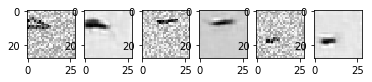

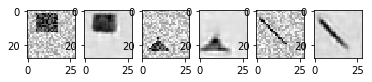

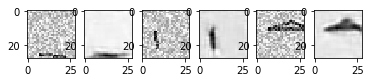

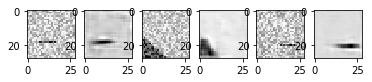

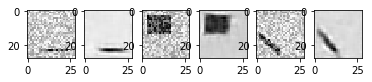

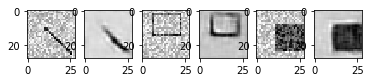

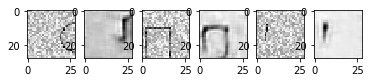

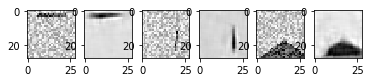

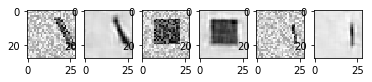

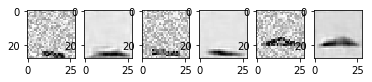

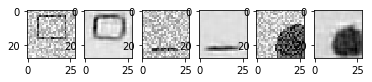

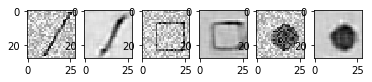

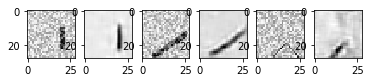

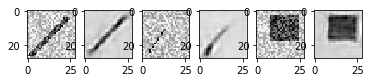

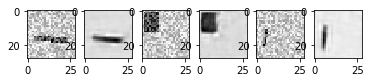

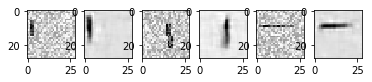

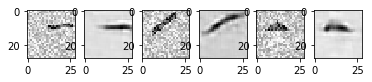

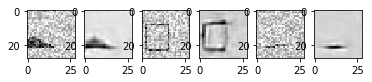

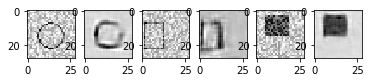

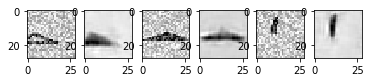

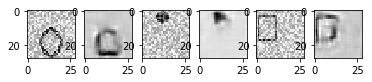

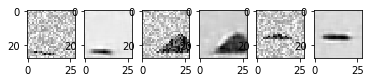

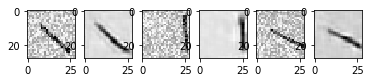

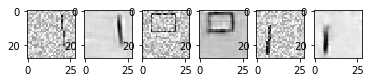

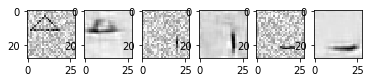

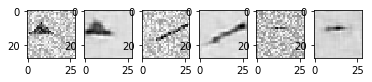

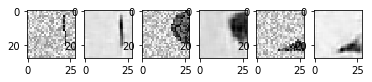

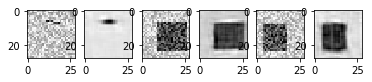

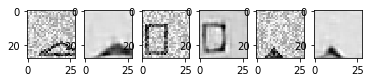

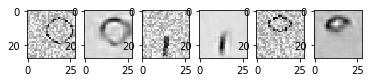

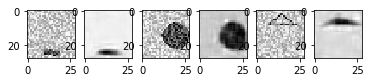

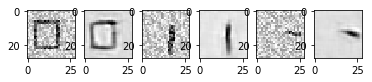

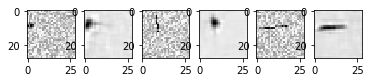

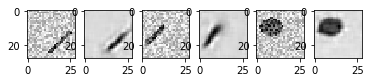

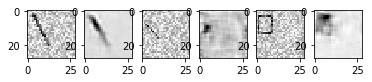

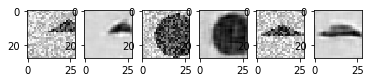

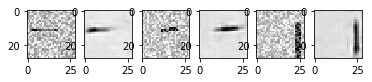

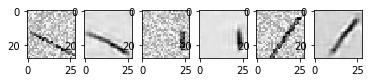

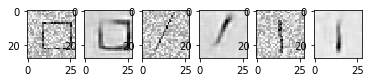

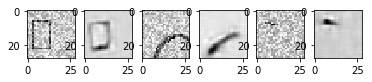

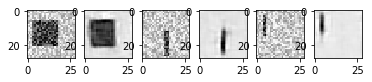

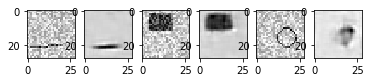

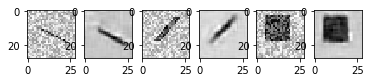

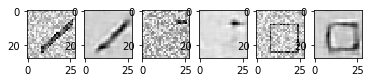

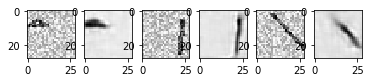

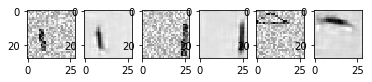

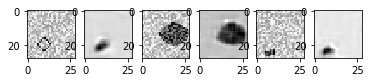

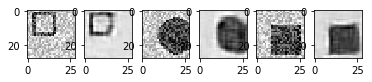

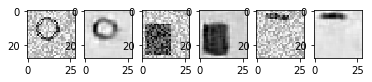

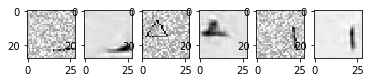

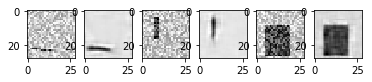

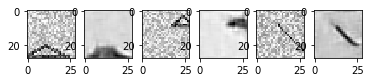

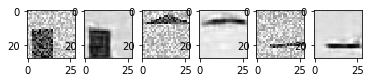

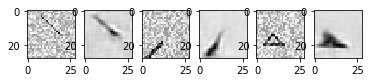

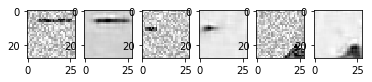

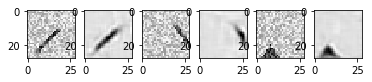

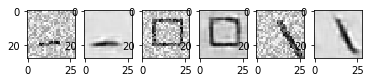

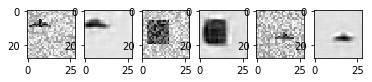

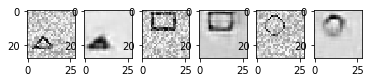

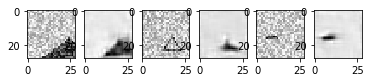

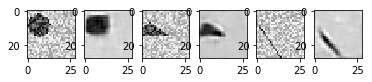

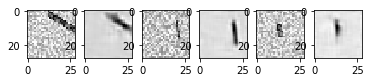

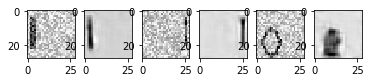

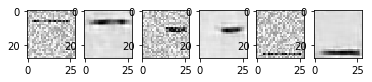

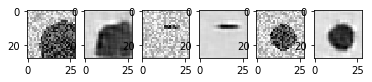

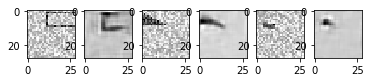

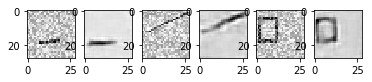

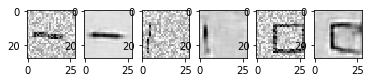

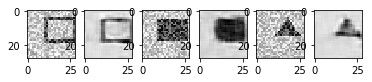

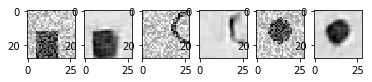

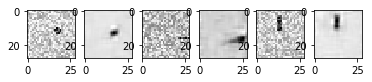

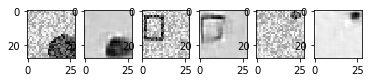

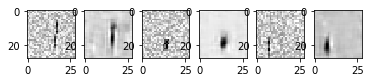

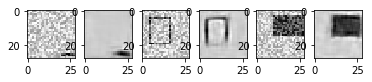

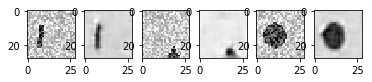

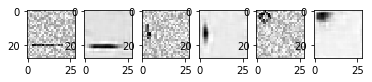

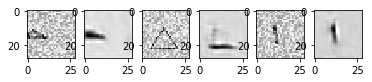

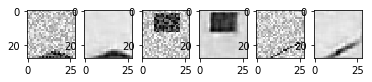

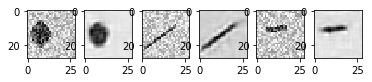

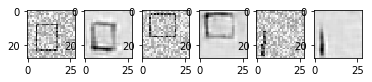

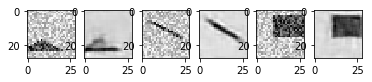

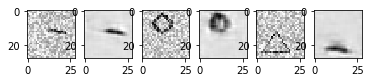

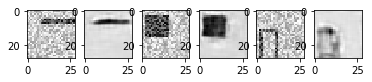

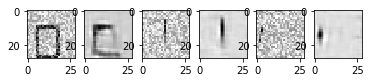

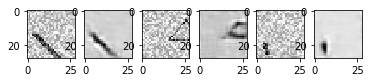

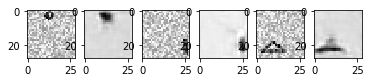

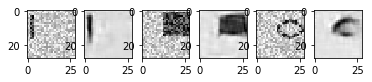

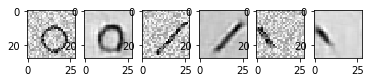

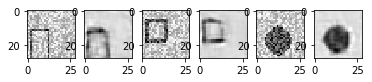

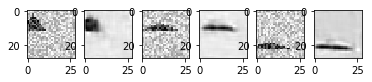

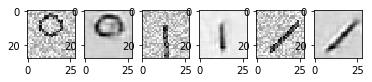

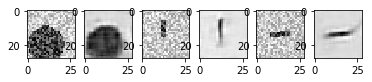

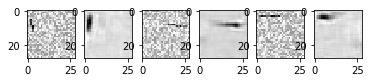

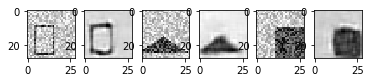

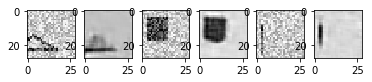

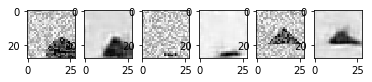

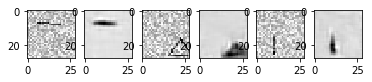

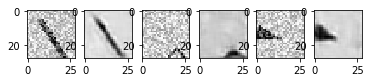

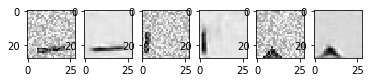

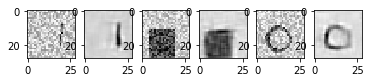

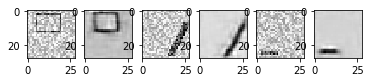

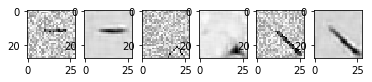

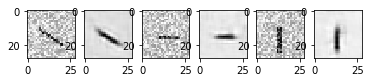

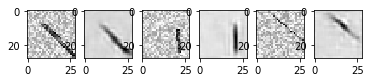

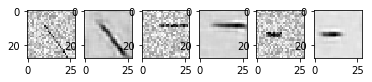

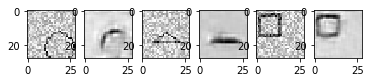

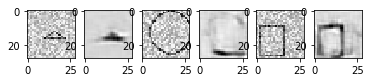

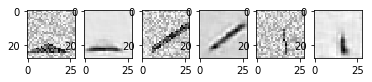

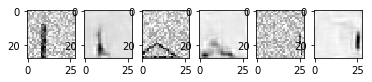

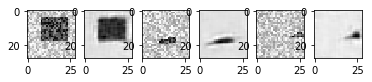

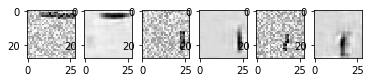

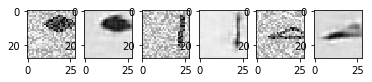

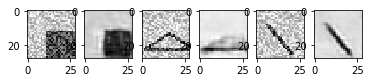

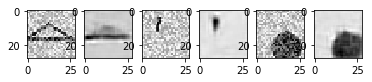

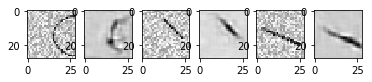

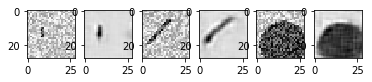

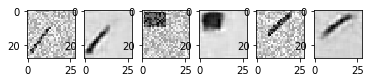

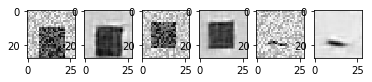

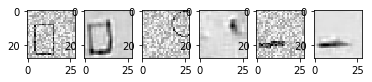

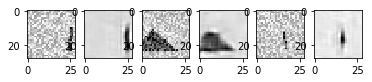

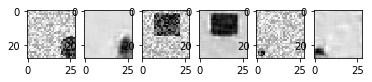

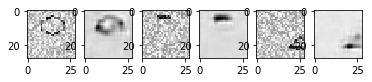

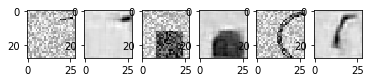

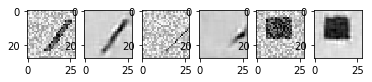

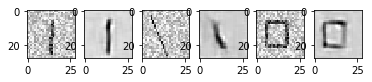

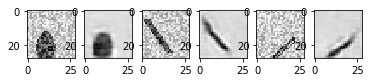

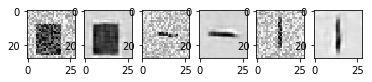

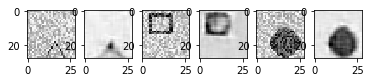

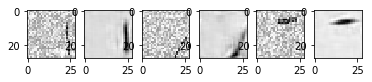

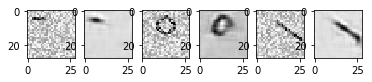

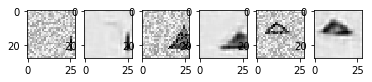

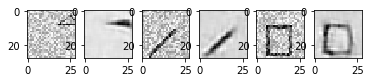

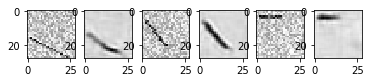

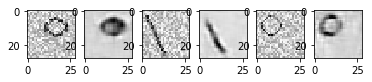

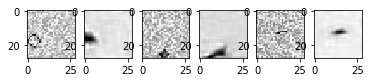

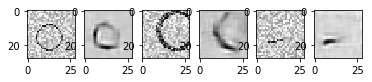

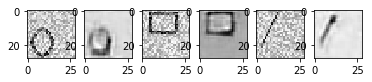

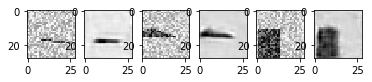

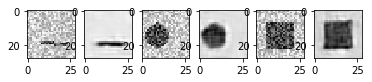

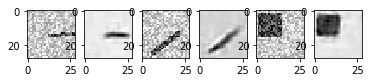

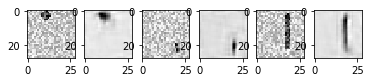

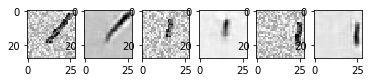

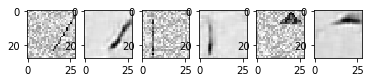

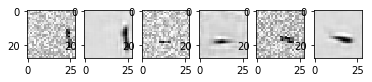

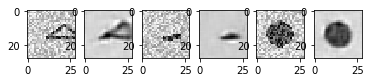

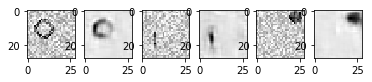

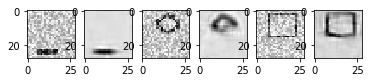

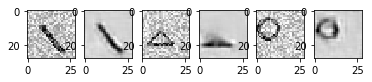

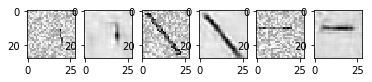

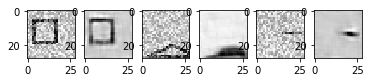

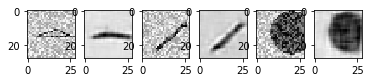

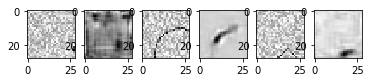

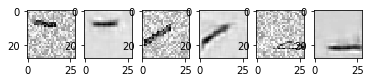

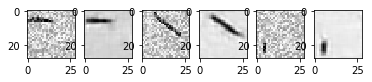

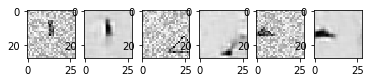

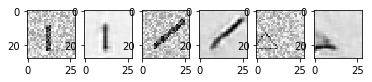

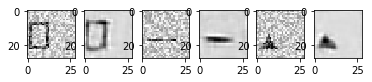

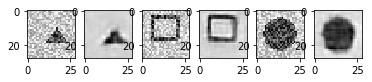

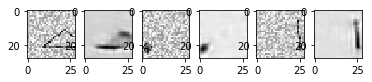

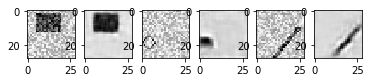

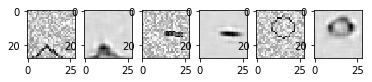

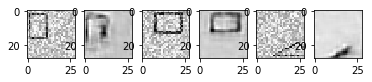

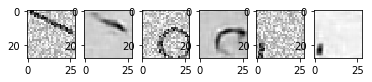

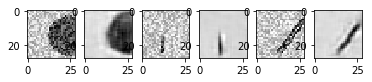

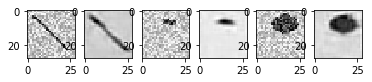

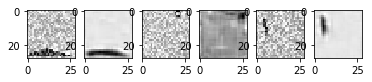

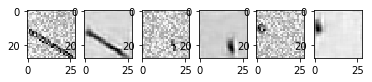

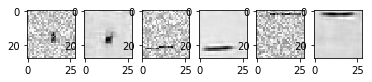

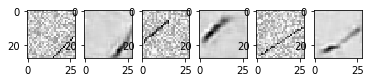

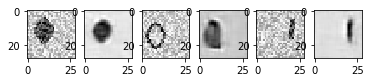

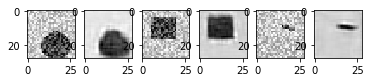

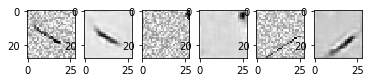

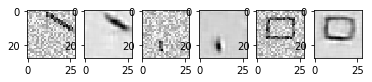

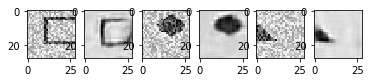

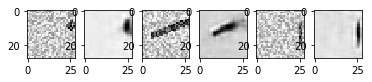

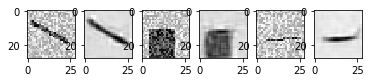

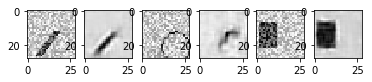

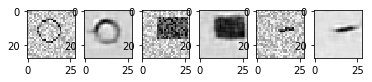

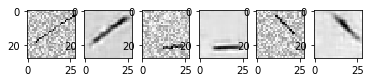

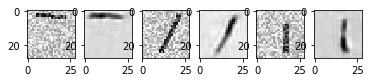

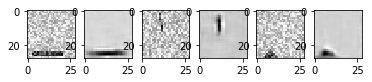

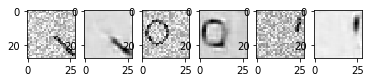

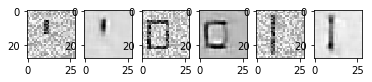

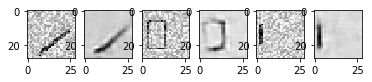

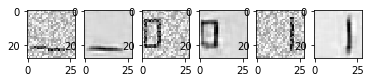

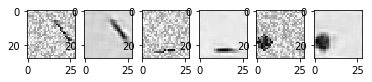

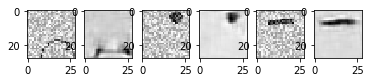

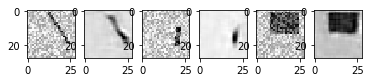

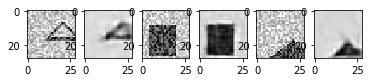

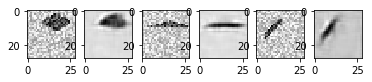

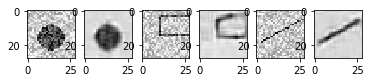

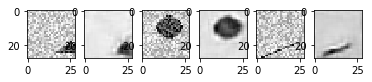

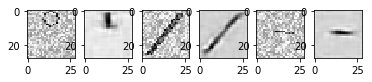

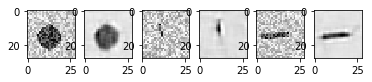

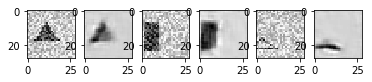

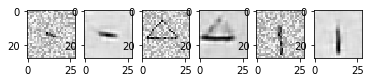

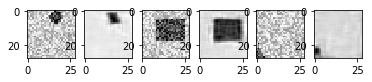

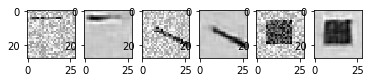

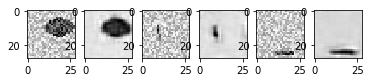

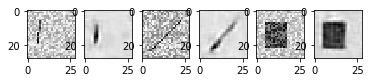

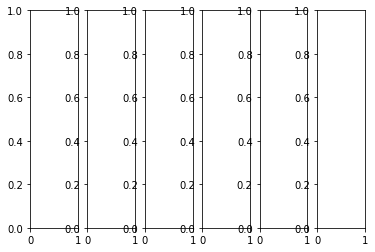

In [42]:
import matplotlib.pyplot as plt

obj = -1
for j in range(len(pred)):
    f, ax = plt.subplots(1,6)
    for i in range(6):
        if i % 2 == 0:
            obj = obj + 1
            if obj >= 600:
                break
            #print(obj)
            ax[i].imshow(x_test[obj].reshape(img_rows, img_cols), cmap=plt.get_cmap('gray'))
        else:
            #print()
            ax[i].imshow(pred[obj].reshape(img_rows, img_cols), cmap=plt.get_cmap('gray'))
    if obj >= 600:
        break
    plt.show()

In [44]:
from keras.models import model_from_json 
json_file = open("origin_cnn_model.json", "r") 
loaded_model_json = json_file.read() 
json_file.close() 
loaded_model = model_from_json(loaded_model_json)

In [45]:
loaded_model.load_weights("origin_cnn_model.h5") 
print("Loaded model from disk")

Loaded model from disk


In [47]:
loaded_model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [48]:
loaded_model.evaluate(x_test, y_test)

600/600 [==============================] - 0s 329us/step


[0.14912631909889418, 0.975]

In [49]:
loaded_model.evaluate(pred, y_test)

600/600 [==============================] - 0s 46us/step


[1.8522136052449545, 0.7633333325386047]

In [33]:
get_layer_output = K.function([new_model.layers[0].input], [new_model.layers[11].output])

In [34]:
x_output = get_layer_output([x_train])

In [32]:
x_output.shape
p1 = model.predict(pred)
p1.shape

(600, 28, 28, 1)